In [1]:
import random

from matplotlib import pyplot as plt

from algorithms import solve_problem, fair_compromise_principle

### Вплив значень параметрів задачі (p) на точність алгоритмів
#### Залежність точності алгоритмів від величини параметра p

Для дослідження впливу параметрів алгоритмів на їх ефективність було обрано параметр тривалості роботи $p$. Експеримент проводився з використанням відносно малих робіт з часом виконання в межах [1,3] та відносно великих робіт з [10,50].

Показником ефективності в даному випадку є відносне покращення розв’язку за принципом справедливого компромісу при переході від розкладу ЖА до розкладу одного з алгоритмів локального пошуку. Маємо два критерії на мінімум, отже покращенням буде зменшення ЦФ. Таким чином, найкращі результати мають найменше від’ємне значення відносного покращення. На графіках вони знаходяться якнайдалі від осі $Ox$.

In [2]:
num_iters = 200
m = 10
n = 100

# Розміри відносно коротких та відносно довгих робіт
p_min_ss = 1
p_max_ss = 3
p_min_ll = 10
p_max_ll = 50

greedy_to_exchange_ss, greedy_to_exchange_ll = [], []
greedy_to_relocation_ss, greedy_to_relocation_ll = [], []

for i in range(num_iters):
    u_values = [random.randint(10, 200) for _ in range(n)]
    p_values_ss = sorted([random.randint(p_min_ss, p_max_ss) for _ in range(n)])
    p_values_ll = sorted([random.randint(p_min_ll, p_max_ll) for _ in range(n)])
        
    (_, _, _,
     F_u_greedy_ss, makespan_greedy_ss,
     F_u_relocation_ss, makespan_relocation_ss,
     F_u_exchange_ss, makespan_exchange_ss) = solve_problem(m=m, n=n, u=u_values, p=p_values_ss)
    
    (_, _, _,
     F_u_greedy_ll, makespan_greedy_ll,
     F_u_relocation_ll, makespan_relocation_ll,
     F_u_exchange_ll, makespan_exchange_ll) = solve_problem(m=m, n=n, u=u_values, p=p_values_ll)
    
    greedy_to_exchange_ss.append(fair_compromise_principle(
        F_u_exchange_ss, makespan_exchange_ss, F_u_greedy_ss, makespan_greedy_ss))
    greedy_to_exchange_ll.append(fair_compromise_principle(
        F_u_exchange_ll, makespan_exchange_ll, F_u_greedy_ll, makespan_greedy_ll))
    
    greedy_to_relocation_ss.append(fair_compromise_principle(
        F_u_relocation_ss, makespan_relocation_ss, F_u_greedy_ss, makespan_greedy_ss))
    greedy_to_relocation_ll.append(fair_compromise_principle(
        F_u_relocation_ll, makespan_relocation_ll, F_u_greedy_ll, makespan_greedy_ll))


--- ЖАДІБНИЙ АЛГОРИТМ ---
Розклад:
М1: [[1, 200], [1, 140], [1, 97], [1, 82], [2, 135], [3, 164], [1, 47], [3, 138], [3, 84], [2, 25], [2, 10]]
М2: [[1, 196], [1, 130], [2, 187], [1, 66], [3, 179], [3, 152], [3, 121], [2, 50], [2, 25], [3, 14]]
М3: [[1, 181], [1, 126], [1, 93], [2, 152], [2, 119], [2, 106], [3, 139], [2, 69], [3, 66], [3, 29]]
М4: [[1, 178], [1, 124], [2, 180], [1, 64], [2, 118], [1, 52], [2, 100], [3, 137], [3, 82], [3, 33]]
М5: [[1, 175], [1, 123], [2, 178], [2, 126], [2, 109], [3, 150], [2, 80], [2, 52], [3, 56], [3, 12]]
М6: [[1, 174], [1, 121], [2, 175], [1, 62], [3, 168], [3, 150], [3, 116], [3, 61], [3, 26]]
М7: [[1, 171], [1, 120], [2, 171], [3, 184], [3, 156], [2, 90], [2, 63], [1, 20], [3, 54], [3, 10]]
М8: [[1, 162], [1, 104], [1, 83], [2, 140], [3, 167], [2, 96], [3, 133], [3, 77], [3, 31]]
М9: [[1, 148], [1, 104], [2, 166], [2, 122], [1, 53], [3, 155], [2, 85], [1, 31], [2, 50], [2, 29], [2, 16]]
М10: [[1, 140], [1, 100], [1, 82], [1, 68], [3, 182], [3, 1

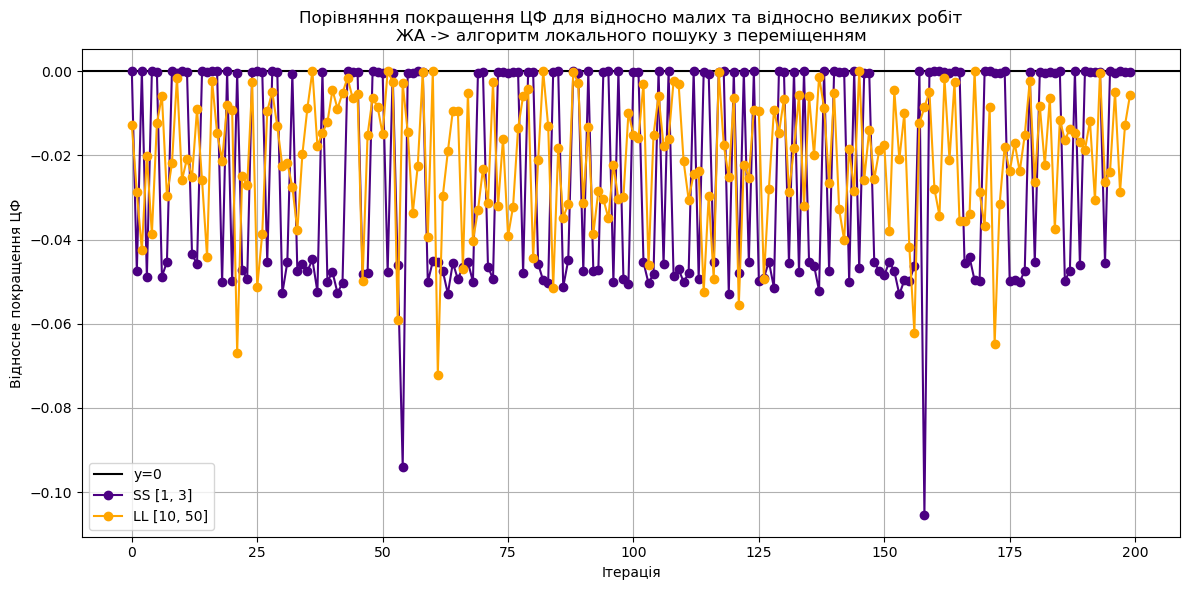

In [5]:
plt.figure(figsize=(12, 6))
plt.axhline(y=0, color='black', label="y=0")
plt.plot(range(num_iters), greedy_to_relocation_ss, marker='o', color="indigo", label=f"SS [{p_min_ss}, {p_max_ss}]")
plt.plot(range(num_iters), greedy_to_relocation_ll, marker='o', color="orange", label=f"LL [{p_min_ll}, {p_max_ll}]")
plt.xlabel("Ітерація")
plt.ylabel("Відносне покращення ЦФ")
plt.title("Порівняння покращення ЦФ для відносно малих та відносно великих робіт\n"
          "ЖА -> алгоритм локального пошуку з переміщенням")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

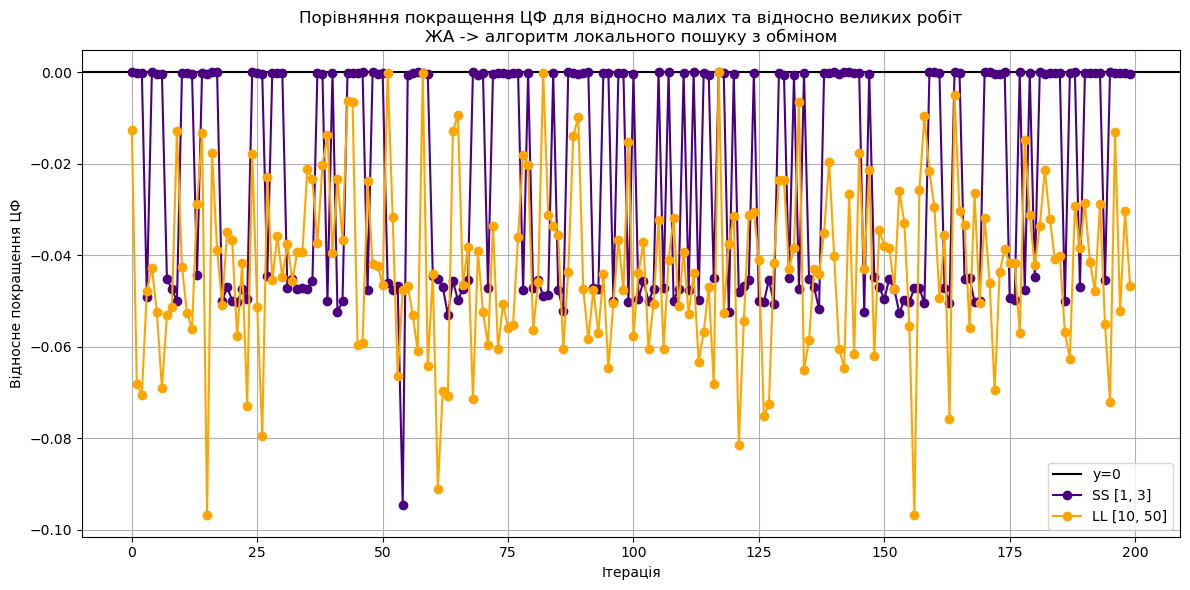

In [6]:
plt.figure(figsize=(12, 6))
plt.axhline(y=0, color='black', label="y=0")
plt.plot(range(num_iters), greedy_to_exchange_ss, marker='o', color="indigo", label=f"SS [{p_min_ss}, {p_max_ss}]")
plt.plot(range(num_iters), greedy_to_exchange_ll, marker='o', color="orange", label=f"LL [{p_min_ll}, {p_max_ll}]")
plt.xlabel("Ітерація")
plt.ylabel("Відносне покращення ЦФ")
plt.title("Порівняння покращення ЦФ для відносно малих та відносно великих робіт\n"
          "ЖА -> алгоритм локального пошуку з обміном")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Порівнюючи два графіки, можна сказати, що, не враховуючи аномалій, для відносно малих робіт обидва алгоритми локального пошуку здійснюють покращення на $v_1+v_2=-0.05$ або не здійснюють його взагалі $v_1+v_2=0$ (значення на осі $Ox$). Для відносно великих робіт більше покращення показує саме алгоритм локального пошуку з обміном. Це можна пояснити особливістю роботи алгоритмів. Алгоритм локального пошуку з переміщенням показує себе погано при відносно великих роботах саме через те, що він переставляє одну роботу за ітерацію. Тобто, при перестановці довгої за часом роботи, шанс переставити її та отримати покращення розкладу не дуже великий, адже таким чином ми можемо значно погіршити показник makespan. Алгоритм локального пошуку з обміном такої проблеми не має, адже він переставляє дві роботи за ітерацію – здійснює обмін ними між двома машинами. При цьому, шанс покращити обидва критерії зростає.